#### Zadanie 1: Analiza wpływu struktury gramatycznej na toksyczność komentarzy
Przeprowadź analizę zależności składniowych (dependency parsing). Porównaj złożoność struktury gramatycznej w komentarzach o wysokiej i niskiej toksyczności. Przedstaw wyniki na wykresie pudełkowym, aby zobaczyć różnice w złożoności składniowej.

In [1]:
import pandas as pd
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
from wordcloud import WordCloud
from collections import Counter
from spacy import displacy

# Load the small English model
nlp = spacy.load('en_core_web_sm')

In [2]:
df = pd.read_csv('sample.csv')
df.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,593336,0.166667,What a breathe of fresh air to have someone wh...,0.0,0.0,0.0,0.166667,0.0,NaN,NaN,...,151356,approved,0,0,0,4,0,0.0,0,6
1,756192,0.600000,Your jewish friends were the ones who told you...,0.2,0.0,0.6,0.400000,0.0,0.0,0.0,...,158493,approved,0,0,0,0,0,0.0,6,10
2,5407051,0.000000,Possible collusion by Trump and his affiliates...,0.0,0.0,0.0,0.000000,0.0,NaN,NaN,...,343435,approved,0,0,0,1,0,0.0,0,4
3,5808132,0.000000,Exactly. We need a % of GDP spending cap at t...,0.0,0.0,0.0,0.000000,0.0,NaN,NaN,...,368584,approved,0,0,0,7,0,0.0,0,4
4,557013,0.000000,"By your own comment, even if some of them vote...",0.0,0.0,0.0,0.000000,0.0,NaN,NaN,...,149754,approved,0,0,0,1,0,0.0,0,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 45 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   10000 non-null  int64  
 1   target                               10000 non-null  float64
 2   comment_text                         10000 non-null  object 
 3   severe_toxicity                      10000 non-null  float64
 4   obscene                              10000 non-null  float64
 5   identity_attack                      10000 non-null  float64
 6   insult                               10000 non-null  float64
 7   threat                               10000 non-null  float64
 8   asian                                2252 non-null   float64
 9   atheist                              2252 non-null   float64
 10  bisexual                             2252 non-null   float64
 11  black                        

In [ ]:
df[['comment_text', 'target']].isnull().sum()

,0
comment_text,0
target,0


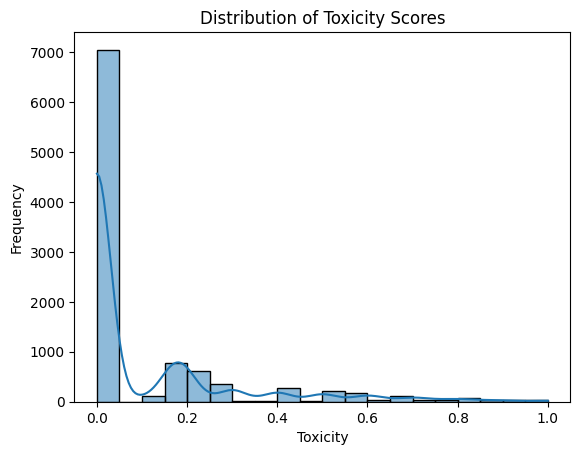

In [ ]:
sns.histplot(df['target'], bins=20, kde=True)
plt.title('Distribution of Toxicity Scores')
plt.xlabel('Toxicity')
plt.ylabel('Frequency')
plt.show()

In [ ]:
threshold = 0.5
df['toxicity_level'] = df['target'].apply(lambda x: 'high' if x >= threshold else 'low')

df['toxicity_level'].value_counts()


,count
toxicity_level,
low,9231
high,769


In [ ]:
def count_dependencies(text):
    doc = nlp(text)
    return len([token for token in doc if token.dep_ != 'punct'])  # wykluczamy interpunkcję


In [ ]:
df['dependency_count'] = df['comment_text'].apply(count_dependencies)
df[['comment_text', 'dependency_count']].head()

,comment_text,dependency_count
0,What a breathe of fresh air to have someone wh...,35
1,Your jewish friends were the ones who told you...,59
2,Possible collusion by Trump and his affiliates...,48
3,Exactly. We need a % of GDP spending cap at t...,51
4,"By your own comment, even if some of them vote...",42


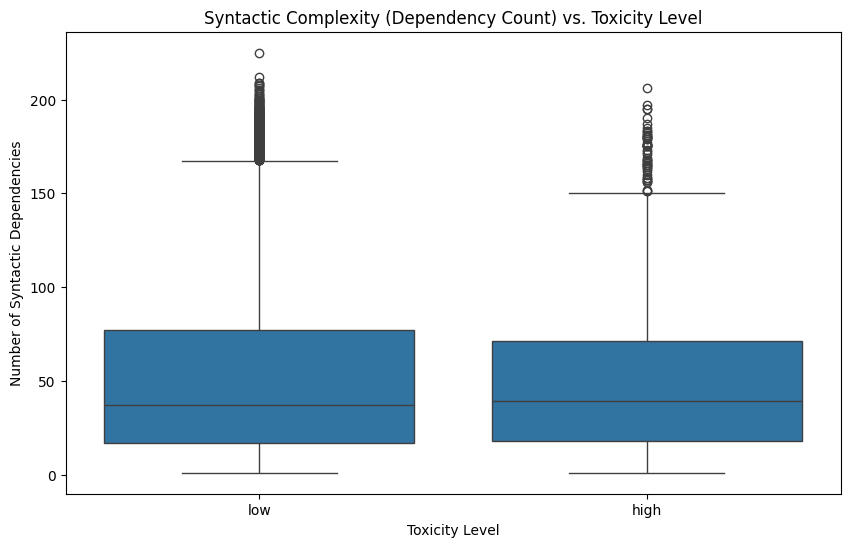

In [ ]:
# Wykres pudełkowy porównujący liczbę zależności składniowych
plt.figure(figsize=(10, 6))
sns.boxplot(x='toxicity_level', y='dependency_count', data=df)
plt.title('Syntactic Complexity (Dependency Count) vs. Toxicity Level')
plt.xlabel('Toxicity Level')
plt.ylabel('Number of Syntactic Dependencies')
plt.show()

#### Zadanie 2: Identyfikacja kluczowych czynników toksyczności na podstawie NER i zależności składniowych
Przeanalizuj najbardziej toksyczne komentarze pod kątem nazwanych jednostek (NER) oraz zależności składniowych (dependency parsing). Zidentyfikuj, jakie nazwane jednostki są najczęściej w toksycznych komentarzach i w jaki sposób struktura zależności przyczynia się do toksyczności. Przedstaw wyniki w postaci drzew zależności i statystyk.




In [ ]:
high_toxicity_comments = df[df['toxicity_level'] == 'high']['comment_text']


In [ ]:
def extract_entities(comments):
    entities = []
    for comment in comments:
        doc = nlp(comment)
        entities.extend([(ent.text, ent.label_) for ent in doc.ents])
    return entities

In [ ]:
entities = extract_entities(high_toxicity_comments)
entity_counts = Counter(entities)
most_common_entities = entity_counts.most_common(10)

In [ ]:
print("Wystapienia Named Entities w toksycznych komentarzach:")
for entity, count in most_common_entities:
    print(f"{entity[0]} ({entity[1]}): {count}")

Wystapienia Named Entities w toksycznych komentarzach:
Trump (ORG): 137
one (CARDINAL): 32
Canada (GPE): 28
first (ORDINAL): 27
Canadians (NORP): 25
American (NORP): 19
Canadian (NORP): 17
Muslim (NORP): 16
Alaska (GPE): 16
Muslims (NORP): 15


In [ ]:
sample_comments = high_toxicity_comments.sample(5, random_state=42)


In [ ]:
def display_dependency_tree(comment):
    doc = nlp(comment)
    return displacy.render(doc, style='dep', jupyter=True)

In [ ]:
for comment in sample_comments:
    print(f"\nDependency Tree for Comment: {comment}")
    display_dependency_tree(comment)


Dependency Tree for Comment: I'm not impressed... those things are taking place because of political stupidity by both parties. They are still trying to implement MORE laws like we need or want them



Dependency Tree for Comment: What is wrong with Alaskans? More taxes and smaller paychecks are attractive to you people? Bernie Sanders? You people are nuts!



Dependency Tree for Comment: The issue is the when both sides work in opposition to each other you get this kind of " All management are useless leches", who's only goal is to steal from them. This is the North American way of business, the Germans understand you need the worker's and Management to work in tandem together for everyone's benefit!



Dependency Tree for Comment: raise your hand if you're surprised to hear this tweet came from an account that spews anti Semitic crap. 

Real great supporters you got there,  small hands.



Dependency Tree for Comment: "Never argue with a fool. Onlookers may not be able to tell the difference!"   Mark Twain

“I always cheer up immensely if an attack is particularly wounding because I think, well, if they attack one personally, it means they have not a single political argument left.”          Margaret Thatcher


In [ ]:
def analyze_dependencies(comments):
    dependency_counts = []
    for comment in comments:
        doc = nlp(comment)
        dependency_counts.append(len([token for token in doc if token.dep_ != 'punct']))  # excluding punctuation
    return dependency_counts

In [ ]:
dependency_counts = analyze_dependencies(high_toxicity_comments)
print(dependency_counts)

[59, 45, 61, 18, 13, 60, 15, 8, 19, 172, 14, 15, 97, 54, 14, 32, 43, 11, 22, 28, 5, 49, 9, 71, 61, 79, 74, 48, 33, 115, 94, 150, 20, 46, 52, 3, 26, 8, 30, 41, 179, 70, 50, 67, 111, 20, 31, 10, 41, 47, 48, 144, 59, 86, 32, 9, 127, 102, 78, 30, 128, 177, 175, 17, 176, 50, 100, 56, 22, 176, 12, 20, 3, 75, 71, 9, 12, 36, 67, 71, 146, 6, 70, 68, 46, 27, 56, 26, 61, 28, 169, 68, 45, 17, 60, 38, 58, 99, 15, 20, 44, 3, 7, 26, 151, 52, 42, 183, 80, 24, 157, 41, 30, 31, 39, 14, 23, 96, 195, 105, 75, 6, 58, 25, 54, 7, 22, 16, 195, 17, 13, 55, 3, 19, 29, 22, 122, 59, 180, 187, 1, 38, 32, 22, 4, 33, 18, 91, 81, 33, 12, 56, 106, 24, 31, 12, 114, 5, 168, 19, 33, 17, 52, 74, 173, 12, 5, 69, 69, 84, 45, 74, 50, 6, 12, 68, 180, 74, 119, 26, 15, 39, 34, 36, 47, 57, 181, 34, 165, 73, 60, 85, 103, 12, 36, 67, 37, 5, 64, 6, 84, 78, 5, 32, 23, 20, 82, 5, 26, 8, 23, 38, 6, 97, 13, 23, 15, 41, 16, 13, 21, 146, 30, 9, 17, 12, 5, 42, 24, 21, 62, 7, 38, 55, 22, 7, 7, 51, 91, 31, 29, 71, 36, 17, 67, 98, 15, 47, 71

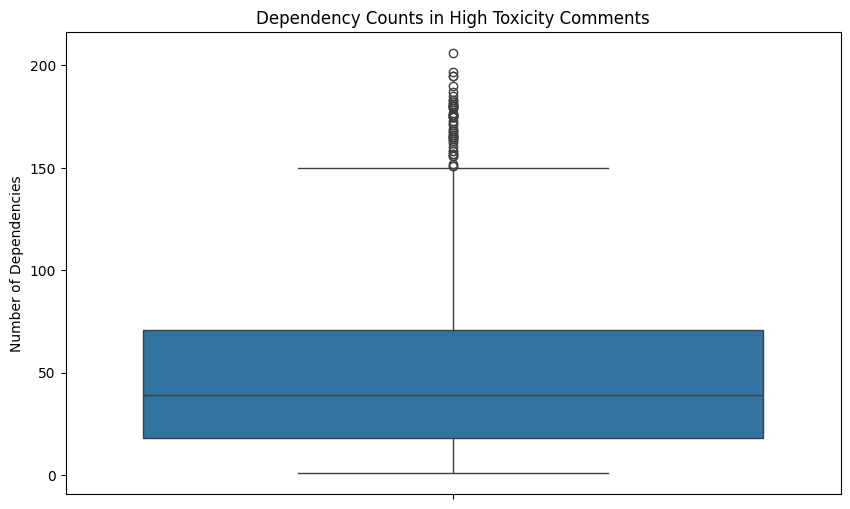

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=dependency_counts)
plt.title('Dependency Counts in High Toxicity Comments')
plt.ylabel('Number of Dependencies')
plt.show()

#### Zadanie 3: Analiza stylu narracyjnego na podstawie zależności składniowych
Przeprowadź analizę zależności składniowych dla zdań z obu książek. Porównaj złożoność składniową obu tekstów (np. liczba podmiotów, dopełnień, orzeczeń w jednym zdaniu) i przedstaw wyniki na wykresach oraz wizualizacjach drzew składniowych.


In [4]:
with open('anna_karenina.txt', 'r', encoding='utf-8') as file:
    book1_text = file.read()
with open('jane_eyre.txt', 'r', encoding='utf-8') as file:
    book2_text = file.read()

nlp.max_length = 2000000

In [5]:
def split_text_into_sentences(text):
    doc = nlp(text)
    return list(doc.sents)

In [6]:
def split_large_text(text, limit=100000):
    return [text[i:i+limit] for i in range(0, len(text), limit)]

In [7]:
book1_fragments = split_large_text(book1_text)
book2_fragments = split_large_text(book2_text)


In [8]:
def analyze_syntax(fragments, max_sentences=5):
    for fragment in fragments[:max_sentences]:
        sentences = split_text_into_sentences(fragment)
        for sentence in sentences[:max_sentences]:  # Limiting number of sentences per fragment
            print(sentence)
            spacy.displacy.render(nlp(sentence.text), style="dep", jupyter=True, options={'distance': 90})


In [9]:
print("Analiza składniowa - Anna Karenina")
analyze_syntax(book1_fragments)

Analiza składniowa - Anna Karenina
﻿The Project Gutenberg eBook of Anna Karenina
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever.


You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org.


If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.




Title: Anna Karenina

Author: graf Leo Tolstoy

Translator:


Constance Garnett

Release date: July 1, 1998


give her; and the other sacrifices everything for you and asks
for nothing.


What are you to do?


How are you to act?


There’s a fearful
tragedy in it.”




stay to supper, but went home.





Chapter 24

“Yes, there is something in me hateful, repulsive,” thought Levin, as
he came away from the Shtcherbatskys’, and walked in the direction of
his brother’s lodgings.


“And I don’t get on with other people.


Pride,
they say.


away, and nothing was left but the most
loathsome.


Come, how am I to tell you?”


she went on, seeing the puzzled
look in her sister’s eyes.


“Father began saying something to me just
now....


It seems to me he thinks all I want is to be married.


e he’s giving you sixty by installments.


So that in
fact you’re making him a present of thirty thousand.”

“Come, don’t let your imagination run away with you,” said Stepan
Arkadyevitch piteously.


“Why was it none would give it, then?”

“Why, because he has an understanding with the merchants; he’s bought
them off.


I’ve had to do with all of them; I know them.


They’re not
merchants, you know: they’re speculators.


In [10]:
print("Analiza składniowa - Jane Eyre")
analyze_syntax(book2_fragments)


Analiza składniowa - Jane Eyre
﻿The Project Gutenberg eBook of Jane Eyre: An Autobiography
    



This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever.


You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org.


If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.




Title: Jane Eyre: An Autobiography

Author: Charlotte Brontë

Illustrator: F. H. Townsend

Release date: March 1, 1998 [eBook #1260]
                Most recently updated: May 2, 2023

Language: English

Credits: David Price


*** START OF THE PROJECT GUTENBERG EBOOK JANE EYRE: AN AUTOBIOGRAPHY ***




JANE EYRE
AN AUTOBIOGRAPHY

by Charlotte Brontë

_ILLUSTRATED BY F. H. TOWNSEND_

London
SERVICE & PATON
5 HENRIETTA STREET
1897

_


hmetic succeeded,
and music lessons were given by Miss Temple to some of the elder girls.



The duration of each lesson was measured by the clock, which at last
struck twelve.


The superintendent rose—

“I have a word to address to the pupils,” said she.




The tumult of cessation from lessons was already breaking forth, but it
sank at her voice.


She went on—

“You had this morning a breakfast which you could not eat; you must be
hungry:—I have ordered that a lunch of bread and cheese shall be served
to all.”




ay; but they were found out and stopped.



It was Miss Reed that found them out: I believe she was envious; and
now she and her sister lead a cat and dog life together; they are
always quarrelling—”

“Well, and what of John Reed?”

“Oh, he is not doing so well as his mama could wish.


He went to
college, and he got—plucked, I think they call it: and then his uncles
wanted him to be a barrister, and study the law: but he is such a
dissipated young man, they will never make much of him, I think.”




“What does he look like?”

“He is very tall: some people call him a fine-looking young man; but he
has such thick lips.”




“And Mrs. Reed?”

“Missis looks stout and well enough in the face, but I think she’s not
quite easy in her mind: Mr. John’s conduct does not please her—he
spends a deal of money.”




h; the manner was
frank and sincere; one does not often see such a manner: no, on the
contrary, affectation, or coldness, or stupid, coarse-minded
misapprehension of one’s meaning are the usual rewards of candour.


Not
three in three thousand raw school-girl-governesses would have answered
me as you have just done.


But I don’t mean to flatter you: if you are
cast in a different mould to the majority, it is no merit of yours:
Nature did it.


And then, after all, I go too fast in my conclusions:
for what I yet know, you may be no better than the rest; you may have
intolerable defects to counterbalance your few good points.”




“And so may you,” I thought.


e, Louisa?”

“No, never: we might do what we pleased; ransack her desk and her
workbox, and turn her drawers inside out; and she was so good-natured,
she would give us anything we asked for.”




“I suppose, now,” said Miss Ingram, curling her lip sarcastically, “we
shall have an abstract of the memoirs of all the governesses extant: in
order to avert such a visitation, I again move the introduction of a
new topic.


Mr. Rochester, do you second my motion?”

“Madam, I support you on this point, as on every other.”




“Then on me be the onus of bringing it forward.


Signior Eduardo, are
you in voice to-night?”

“Donna Bianca, if you command it, I will be.”





#### Zadanie 4: Analiza tematyczna na podstawie NER i lematyzacji – porównanie podejścia do postaci i miejsc w obu książkach
Wykorzystaj NER i lematyzację, aby porównać, w jaki sposób "Anna Karenina" i "Jane Eyre" traktują postaci i miejsca. Zidentyfikuj najczęściej wspominane jednostki i zanalizuj ich kontekst. Wyniki przedstaw w formie chmur słów i raportu porównawczego.

In [11]:
def named_entity_analysis(fragments):
    entities = []
    for fragment in fragments:
        doc = nlp(fragment)
        entities.extend([(ent.text, ent.label_) for ent in doc.ents])
    return entities

In [12]:
entities_book1 = named_entity_analysis(book1_fragments)
entities_book2 = named_entity_analysis(book2_fragments)

In [13]:
def get_most_common_entities(entities, label):
    filtered_entities = [ent[0] for ent in entities if ent[1] == label]
    return Counter(filtered_entities).most_common(10)

In [14]:
print("Najczęstsze osoby w Anna Karenina:", get_most_common_entities(entities_book1, 'PERSON'))

Najczęstsze osoby w Anna Karenina: [('Levin', 1434), ('Anna', 712), ('Kitty', 630), ('Vronsky', 457), ('Alexey Alexandrovitch', 429), ('Stepan Arkadyevitch', 146), ('Varenka', 136), ('Darya Alexandrovna', 114), ('Betsy', 107), ('Seryozha', 86)]


In [15]:
print("Najczęstsze miejsca w Anna Karenina:", get_most_common_entities(entities_book1, 'GPE'))

Najczęstsze miejsca w Anna Karenina: [('Moscow', 170), ('Petersburg', 80), ('Russia', 57), ('Levin', 52), ('Stiva', 43), ('Dolly', 42), ('Alexey', 40), ('Tanya', 20), ('Nikolay', 20), ('Anna', 19)]


In [16]:
print("Najczęstsze osoby w Jane Eyre:", get_most_common_entities(entities_book2, 'PERSON'))

Najczęstsze osoby w Jane Eyre: [('Rochester', 301), ('Jane', 260), ('Fairfax', 109), ('Bessie', 100), ('Reed', 87), ('Mary', 81), ('Diana', 73), ('John', 55), ('Project Gutenberg', 48), ('Eyre', 46)]


In [17]:
print("Najczęstsze miejsca w Jane Eyre:", get_most_common_entities(entities_book2, 'GPE'))

Najczęstsze miejsca w Jane Eyre: [('Adèle', 83), ('Thornfield', 61), ('St. John', 56), ('Georgiana', 39), ('England', 34), ('London', 21), ('Lowood', 21), ('Fairfax', 20), ('India', 18), ('Helen', 16)]


In [18]:
def generate_wordcloud(entities, label, title):
    words = ' '.join([ent[0] for ent in entities if ent[1] == label])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

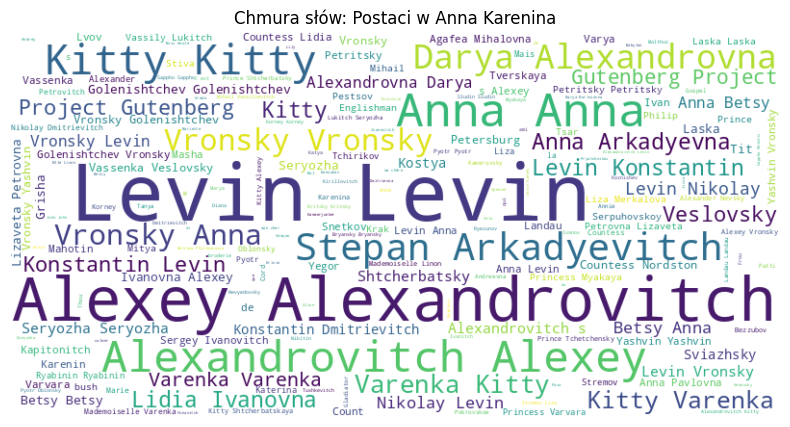

In [19]:
generate_wordcloud(entities_book1, 'PERSON', "Chmura słów: Postaci w Anna Karenina")

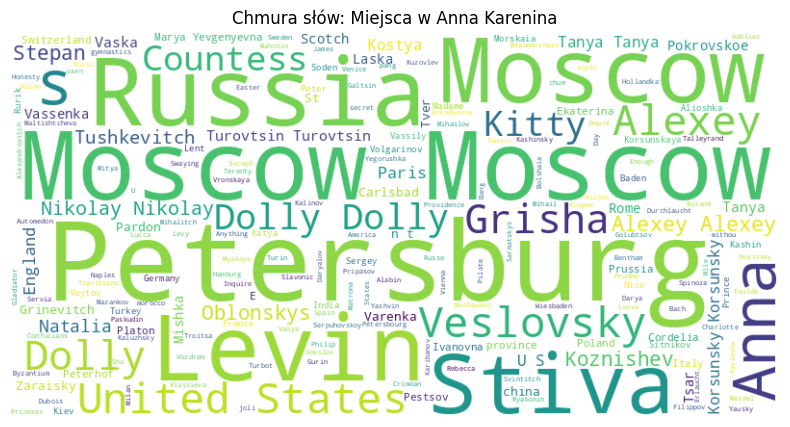

In [20]:
generate_wordcloud(entities_book1, 'GPE', "Chmura słów: Miejsca w Anna Karenina")

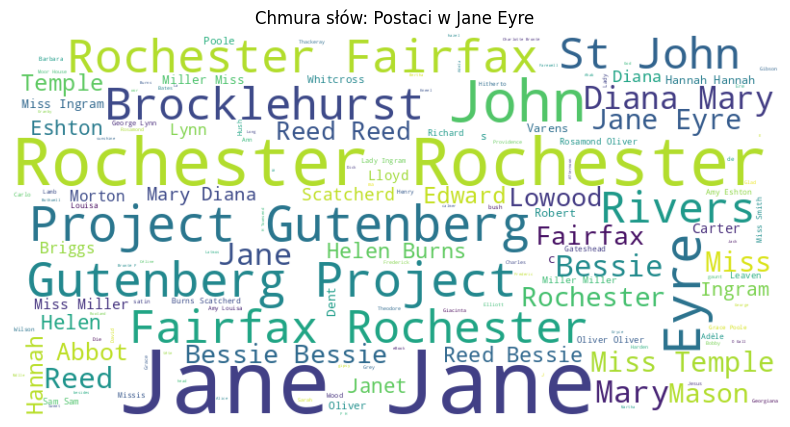

In [21]:
generate_wordcloud(entities_book2, 'PERSON', "Chmura słów: Postaci w Jane Eyre")

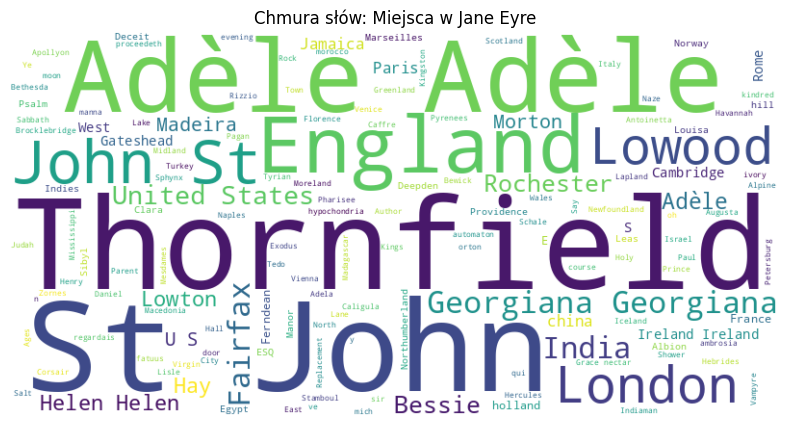

In [22]:
generate_wordcloud(entities_book2, 'GPE', "Chmura słów: Miejsca w Jane Eyre")